In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path = '/content/drive/MyDrive/COURSEW/Rsrch/'

In [3]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from Modules.data_processing import split_data, get_statistics, preprocess_books, shorten_sessions

In [4]:
%pip install trfl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 kB 3.4 MB/s eta 0:00:00


In [5]:
from Modules.train import train, test, sas_train, sas_test
from Modules.misc import last_results, plot_validation

In [ ]:
n_sessions = 50000
# sorted_events = sample_data('data', 'events.csv')
sorted_events = pd.read_csv(data_path + 'data/sorted_events.csv')
ch_sorted_events, itm2idx = shorten_sessions(sorted_events, n_sessions=n_sessions)
train_df, val_df, test_df = split_data(ch_sorted_events)
replay_buf, data_stats = get_statistics(ch_sorted_events, train_df)

unique: 50522 min: 0 max: 50521


In [ ]:
data_stats

,state_size,item_num
0,10,50522


# DQN

In [ ]:
arg_dict = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.001,
            'epoch' : 10,
            'batch_size' : 512,
            'neg' : 10,
            'discount' : 0.5
            }
results_dqn = []
losses_dqn = []
DQN_1, sess_DQN = train(data_stats, replay_buf, val_df, arg_dict=arg_dict, results=results_dqn, losses=losses_dqn)

Instructions for updating:
non-resource variables are not supported in the long term
/content/Modules/Model.py:219: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/content/Modules/SASRecModules.py:59: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None)
/content/Modules/SASRecModules.py:60: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:61: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  V = tf.compat.v1.layers.dense(keys, num_units, activation=

NUM BATCHES in 1 EPOCH: 486
$$$$ STARTING EPOCH # 0 $$$$
the loss in 100th batch is: 4.593657
the loss in 200th batch is: 1.983056
the loss in 300th batch is: 1.459239
the loss in 400th batch is: 1.134223
#############################################################
total clicks: 27964, total purchase:1331
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 0.200000
clicks hr ndcg @ 5 : 0.000036, 0.000023
purchase hr and ndcg @5 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 0.800000
clicks hr ndcg @ 10 : 0.000143, 0.000056
purchase hr and ndcg @10 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 1.600000
clicks hr ndcg @ 15 : 0.000286, 0.000092
purchase hr and ndcg @15 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 1.800000
clicks hr ndcg @ 20 : 0.000322, 0.000101
purchase hr a

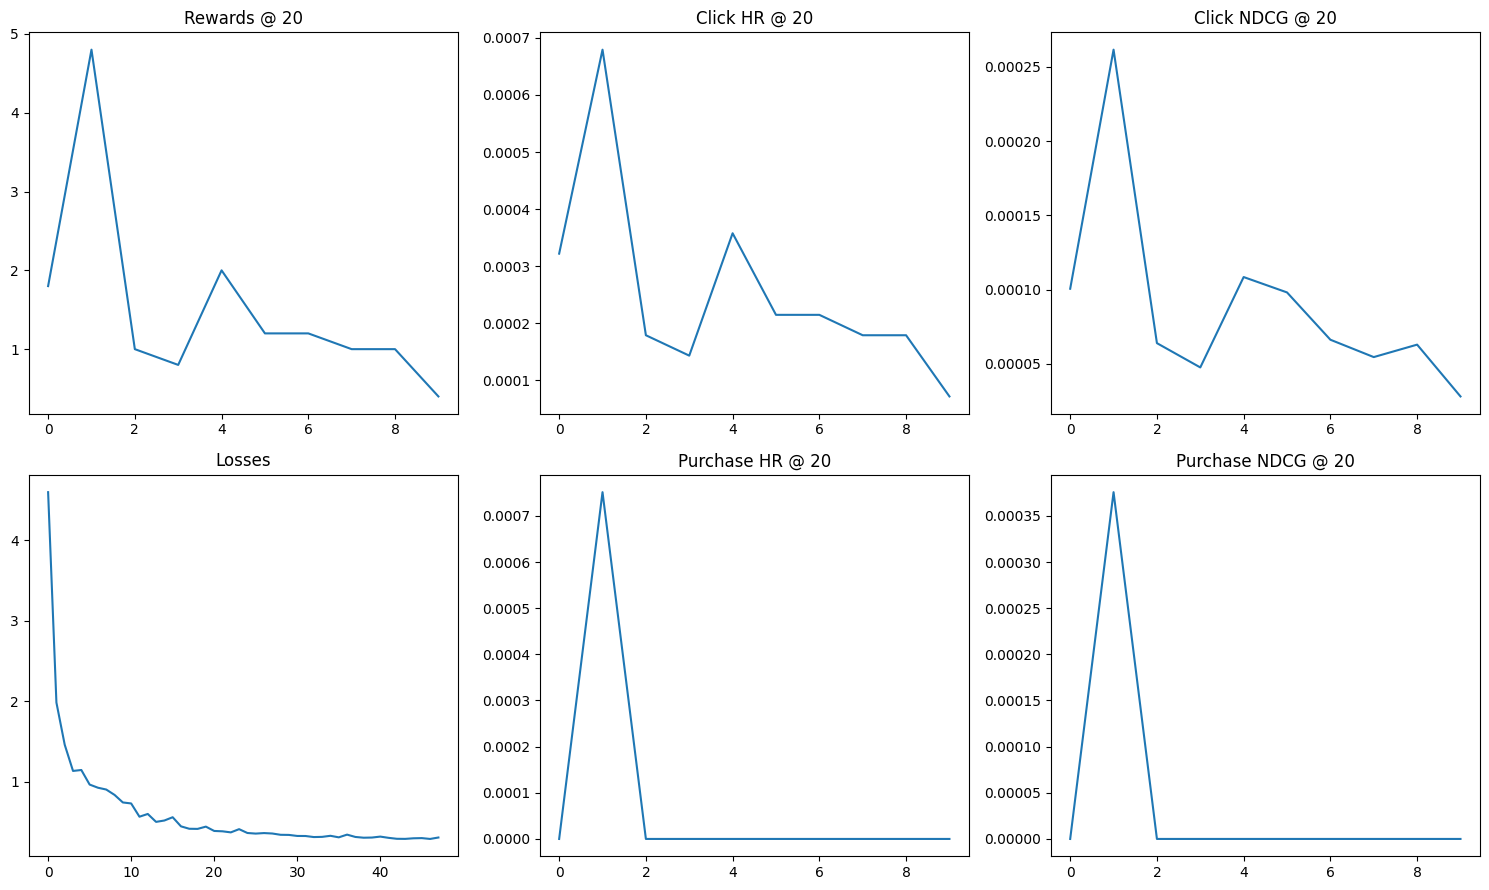

In [ ]:
plot_validation(losses_dqn, results_dqn, at=20)

In [ ]:
VAL_RESULTS_DQN = last_results(results_dqn)

In [ ]:
test_results_DQN = []
test(sess_DQN, DQN_1, data_stats, test_df, test_results_DQN, data_dir=data_path + 'data/')

#############################################################
total clicks: 30867, total purchase:1468
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 0.800000
clicks hr ndcg @ 5 : 0.000130, 0.000077
purchase hr and ndcg @5 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 0.800000
clicks hr ndcg @ 10 : 0.000130, 0.000077
purchase hr and ndcg @10 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 1.000000
clicks hr ndcg @ 15 : 0.000162, 0.000086
purchase hr and ndcg @15 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 1.600000
clicks hr ndcg @ 20 : 0.000259, 0.000109
purchase hr and ndcg @20 : 0.000000, 0.000000
#############################################################


# SNQN

In [ ]:

arg_dict = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.0025,
            'epoch' : 30,
            'batch_size' : 512,
            'neg' : 10,
            'discount' : 0.5
            }
results_snqn = []
losses_snqn = []
SNQN_1, sess_SNQN = train(data_stats, replay_buf, val_df, arg_dict=arg_dict, results=results_snqn, losses=losses_snqn, configuration='SNQN')

/content/Modules/Model.py:219: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/content/Modules/SASRecModules.py:59: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None)
/content/Modules/SASRecModules.py:60: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:61: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  V = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:96: UserWarning: `tf.layers.dropout` is depre

NUM BATCHES in 1 EPOCH: 486
$$$$ STARTING EPOCH # 0 $$$$
the loss in 100th batch is: 13.449219
the loss in 200th batch is: 11.662287
the loss in 300th batch is: 12.162702
the loss in 400th batch is: 11.024471
#############################################################
total clicks: 27964, total purchase:1331
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 176.400000
clicks hr ndcg @ 5 : 0.019382, 0.015275
purchase hr and ndcg @5 : 0.051089, 0.040662
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 220.600000
clicks hr ndcg @ 10 : 0.024782, 0.017044
purchase hr and ndcg @10 : 0.061608, 0.044115
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 256.200000
clicks hr ndcg @ 15 : 0.029180, 0.018202
purchase hr and ndcg @15 : 0.069872, 0.046272
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 288.000000
clicks hr ndcg @ 20 : 0.032721, 0.019039
p

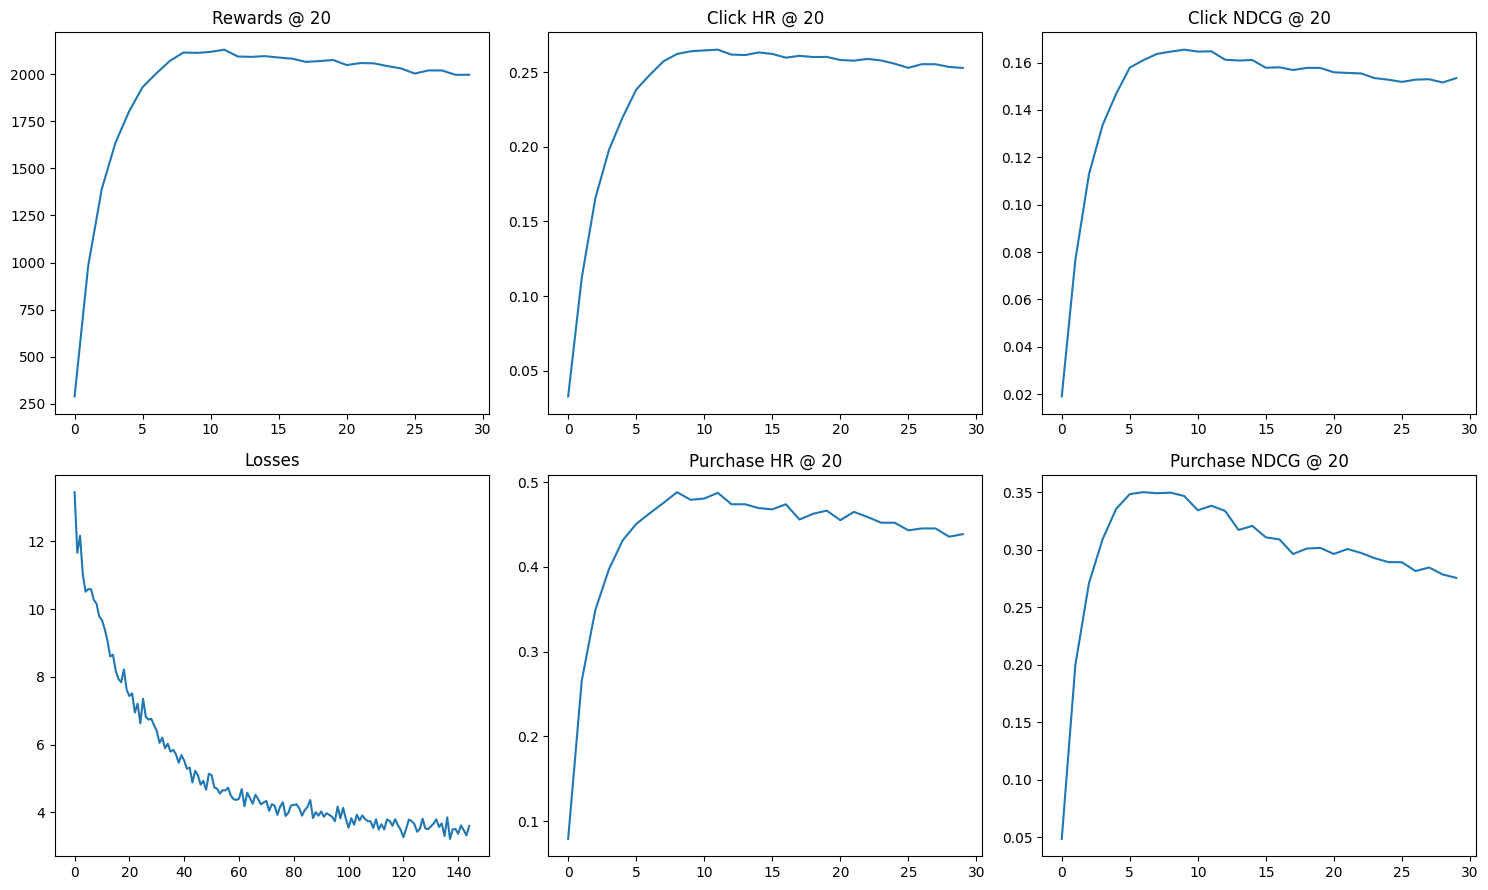

In [ ]:
plot_validation(losses_snqn, results_snqn)

In [ ]:
VAL_RESULTS_SNQN = last_results(results_snqn)

In [ ]:
test_results_SNQN = []
test(sess_SNQN, SNQN_1, data_stats, test_df, test_results_SNQN, data_dir='/content/drive/MyDrive/COURSEW/Rsrch/data')

#############################################################
total clicks: 30867, total purchase:1468
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 1660.200000
clicks hr ndcg @ 5 : 0.183076, 0.137404
purchase hr and ndcg @5 : 0.361035, 0.274674
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 1958.200000
clicks hr ndcg @ 10 : 0.219846, 0.149398
purchase hr and ndcg @10 : 0.409401, 0.290602
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 2108.200000
clicks hr ndcg @ 15 : 0.238475, 0.154335
purchase hr and ndcg @15 : 0.433243, 0.296944
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 2203.800000
clicks hr ndcg @ 20 : 0.250721, 0.157228
purchase hr and ndcg @20 : 0.446866, 0.300158
#############################################################


# SA2C

In [ ]:
# from Modules.data_processing import create_pop_dict

# create_pop_dict()

In [ ]:
from Modules.train import train

In [ ]:
arg_dict = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.002,
            'lr2' : 0.001,
            'epoch' : 30,
            'batch_size' : 512,
            'neg' : 10,
            'discount' : 0.5,
            'smooth' : 0.0,
            'clip' : 0.0
            }
results_sa2c = []
losses_sa2c = []
SA2C_1, sess_sa2c  = train(data_stats, replay_buf, val_df, arg_dict=arg_dict, results=results_sa2c, losses=losses_sa2c, configuration='SA2C', sa2c_switch_step=9000, data_dir='/content/drive/MyDrive/COURSEW/Rsrch/data')


/content/Modules/Model.py:219: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/content/Modules/SASRecModules.py:59: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None)
/content/Modules/SASRecModules.py:60: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:61: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  V = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:96: UserWarning: `tf.layers.dropout` is depre

NUM BATCHES in 1 EPOCH: 475
$$$$ STARTING EPOCH # 0 $$$$
loss in 100th batch is: 13.155294
loss in 300th batch is: 11.476505
loss in 400th batch is: 10.951815
#############################################################
total clicks: 28641, total purchase:1282
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 74.600000
clicks hr ndcg @ 5 : 0.007786, 0.005617
purchase hr and ndcg @5 : 0.023401, 0.018727
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 108.000000
clicks hr ndcg @ 10 : 0.011697, 0.006877
purchase hr and ndcg @10 : 0.031981, 0.021502
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 131.600000
clicks hr ndcg @ 15 : 0.015118, 0.007772
purchase hr and ndcg @15 : 0.035101, 0.022330
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 153.000000
clicks hr ndcg @ 20 : 0.018156, 0.008486
purchase hr and ndcg @20 : 0.038222, 0.023067
off-li

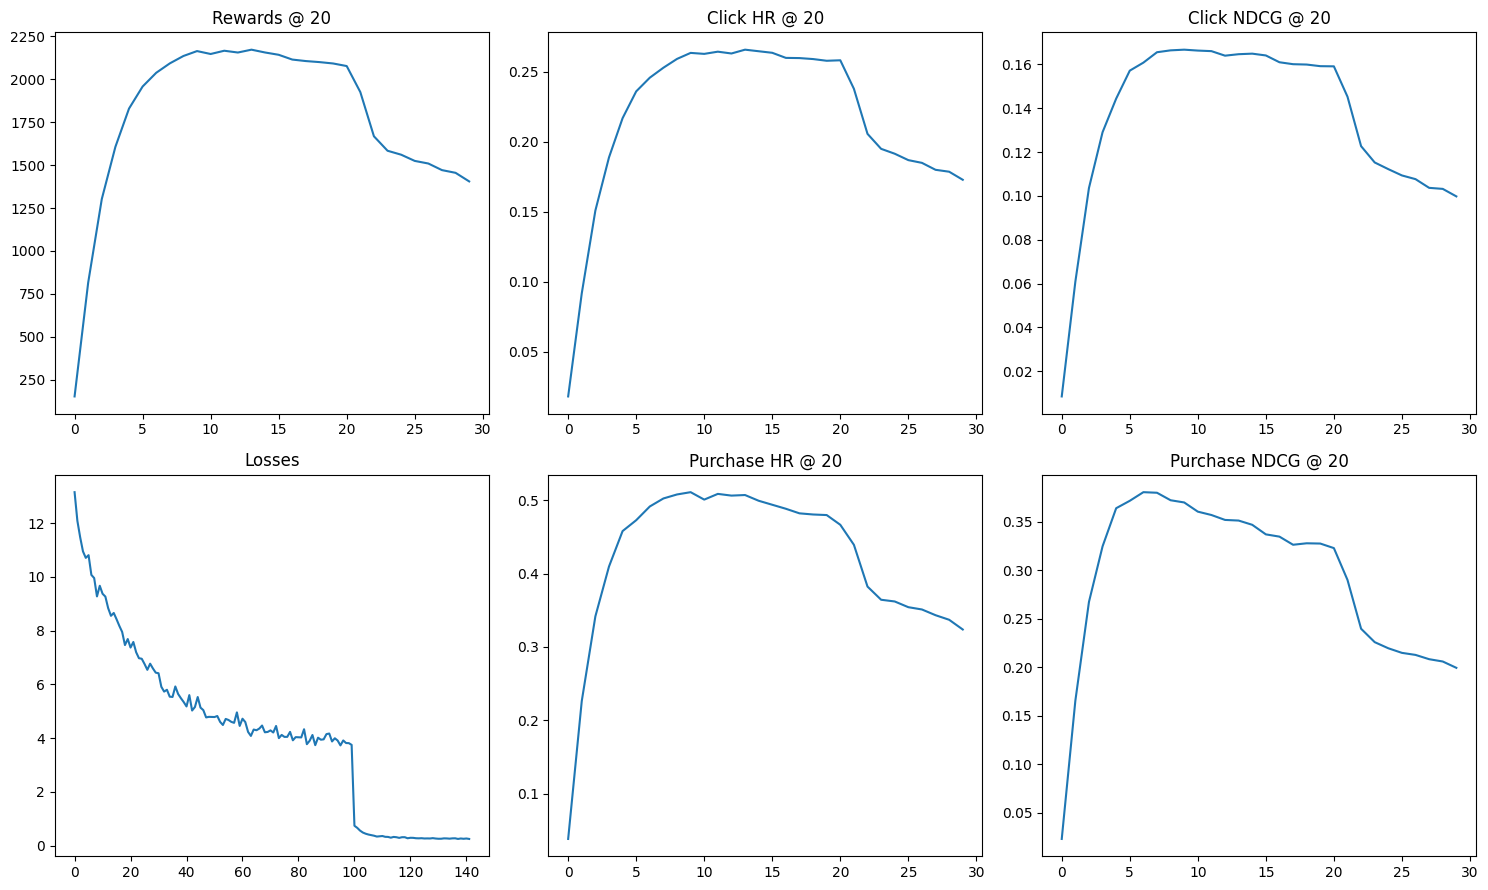

In [ ]:
plot_validation(losses_sa2c, results_sa2c)

In [ ]:
VAL_RESULTS_SA2C = last_results(results_sa2c)

In [ ]:
test_results_SA2C = []
test(sess_sa2c, SA2C_1, data_stats, test_df, test_results_SA2C, data_dir='/content/drive/MyDrive/COURSEW/Rsrch/data')

#############################################################
total clicks: 28988, total purchase:1338
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 959.400000
clicks hr ndcg @ 5 : 0.118221, 0.084720
purchase hr and ndcg @5 : 0.204783, 0.152538
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 1178.800000
clicks hr ndcg @ 10 : 0.147440, 0.094149
purchase hr and ndcg @10 : 0.242152, 0.164655
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 1328.200000
clicks hr ndcg @ 15 : 0.166483, 0.099189
purchase hr and ndcg @15 : 0.271300, 0.172356
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 1428.000000
clicks hr ndcg @ 20 : 0.178522, 0.102029
purchase hr and ndcg @20 : 0.293722, 0.177661
off-line corrected evaluation (click_ng,purchase_ng) @10: 0.092706, 0.157849
#############################################################


# SASRec

In [ ]:
results_sas = []
losses_sas = []
# sas_train(data_stats, replay_buf, val_df, results, losses, batch_size=512, epochs=50,  lr=0.001, to_eval=True, pickle=False, data_dir='data')
SAS, sess_sas  = sas_train(data_stats, replay_buf, val_df, results=results_sas, losses=losses_sas, epochs=30)


/content/Modules/Model.py:37: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/content/Modules/SASRecModules.py:59: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None)
/content/Modules/SASRecModules.py:60: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:61: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  V = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:96: UserWarning: `tf.layers.dropout` is deprec

NUM BATCHES in 1 EPOCH: 486
$$$$ STARTING EPOCH # 0 $$$$
the loss in 100th batch is: 10.302299
the loss in 200th batch is: 9.971667
the loss in 300th batch is: 9.510504
the loss in 400th batch is: 9.031737
total clicks: 27964, total purchase:1331
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
clicks hr ndcg @ 5 : 0.074775, 0.059811
purchase hr and ndcg @5 : 0.189331, 0.159995
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
clicks hr ndcg @ 10 : 0.088828, 0.064346
purchase hr and ndcg @10 : 0.217130, 0.168841
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
clicks hr ndcg @ 15 : 0.096374, 0.066343
purchase hr and ndcg @15 : 0.231405, 0.172588
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
clicks hr ndcg @ 20 : 0.102847, 0.067874
purchase hr and ndcg @20 : 0.239669, 0.174545
#############################################################
$$$$ STARTING EPOCH # 1 $$$$
the loss in 500th batch is: 8.505781
the loss in 600th batch is: 8.1

In [ ]:
VAL_RESULTS_SAS = last_results(results_sas, is_sas=True)

In [ ]:
test_results_SAS = []
# def sas_test(sess, SAS, data_stats, test_df, results, pickle=False, data_dir='data'):
sas_test(sess_sas, SAS, data_stats, test_df, test_results_SAS)

total clicks: 30867, total purchase:1468
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
clicks hr ndcg @ 5 : 0.156672, 0.118886
purchase hr and ndcg @5 : 0.283379, 0.223197
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
clicks hr ndcg @ 10 : 0.188065, 0.129052
purchase hr and ndcg @10 : 0.346049, 0.243745
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
clicks hr ndcg @ 15 : 0.205041, 0.133561
purchase hr and ndcg @15 : 0.374659, 0.251270
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
clicks hr ndcg @ 20 : 0.215052, 0.135927
purchase hr and ndcg @20 : 0.388283, 0.254479
#############################################################


## Comparison

### Validation last step

In [ ]:
print('DQN: \n', VAL_RESULTS_DQN)

DQN: 
 Rewards:
 @5 : 0.2 @10 : 0.4 @15 : 0.4 @20 : 0.4

Click HR:
 @5 : 3.576026319553712e-05 @10 : 7.152052639107424e-05 @15 : 7.152052639107424e-05 @20 : 7.152052639107424e-05

Click NDCG:
 @5 : 1.5401107068852564e-05 @10 : 2.8139169831977372e-05 @15 : 2.8139169831977372e-05 @20 : 2.8139169831977372e-05

Purchase HR:
 @5 : 0.0 @10 : 0.0 @15 : 0.0 @20 : 0.0

Purchase NDCG:
 @5 : 0.0 @10 : 0.0 @15 : 0.0 @20 : 0.0


In [ ]:
print('SNQN: \n', VAL_RESULTS_SNQN)

SNQN: 
 Rewards:
 @5 : 1431.8000000001334 @10 : 1757.2000000001813 @15 : 1911.6000000002061 @20 : 1998.2000000002224

Click HR:
 @5 : 0.17787154913460163 @10 : 0.2190673723358604 @15 : 0.2409526534115291 @20 : 0.25286082105564295

Click NDCG:
 @5 : 0.13144731832981357 @10 : 0.1448285194256577 @15 : 0.15062665878591636 @20 : 0.15343778206805025

Purchase HR:
 @5 : 0.32832456799398946 @10 : 0.39969947407963935 @15 : 0.4237415477084899 @20 : 0.4387678437265214

Purchase NDCG:
 @5 : 0.24228983398389922 @10 : 0.2656748644525483 @15 : 0.27205945365370204 @20 : 0.27561872346437494


In [ ]:
print('SA2C: \n', VAL_RESULTS_SA2C)

SA2C: 
 Rewards:
 @5 : 964.4000000000559 @10 : 1186.000000000092 @15 : 1315.8000000001155 @20 : 1405.2000000001317

Click HR:
 @5 : 0.1151146957159317 @10 : 0.14402430082748507 @15 : 0.1612723019447645 @20 : 0.17286407597500086

Click NDCG:
 @5 : 0.08307917526508629 @10 : 0.09246324592418109 @15 : 0.09703244559344965 @20 : 0.09976670448807361

Purchase HR:
 @5 : 0.23790951638065522 @10 : 0.28159126365054604 @15 : 0.30577223088923555 @20 : 0.3237129485179407

Purchase NDCG:
 @5 : 0.17483235887039092 @10 : 0.18890031138166466 @15 : 0.19530088109556096 @20 : 0.1995409860285422


In [ ]:
print('Default SASRec: \n', VAL_RESULTS_SAS)

Default SASRec: 
 Click HR:
 @5 : 0.14754684594478615 @10 : 0.18037476755828924 @15 : 0.1971105707338006 @20 : 0.20748104706050635

Click NDCG:
 @5 : 0.10867432777820069 @10 : 0.11932579109179432 @15 : 0.1237362062753652 @20 : 0.12618550209432716

Purchase HR:
 @5 : 0.2892561983471074 @10 : 0.3253193087903832 @15 : 0.3486100676183321 @20 : 0.3666416228399699

Purchase NDCG:
 @5 : 0.21184779828960237 @10 : 0.22345377573732772 @15 : 0.22959860243327485 @20 : 0.2338919350050575


### Test

In [ ]:
print("DQN:", test_results_DQN)

DQN: [{5: {'reward': 0.8, 'click hr': 0.00012958823338840832, 'click ndcg': 7.732700966192184e-05, 'purchase hr': 0.0, 'purchase ndcg': 0.0}, 10: {'reward': 0.8, 'click hr': 0.00012958823338840832, 'click ndcg': 7.732700966192184e-05, 'purchase hr': 0.0, 'purchase ndcg': 0.0}, 15: {'reward': 1.0, 'click hr': 0.0001619852917355104, 'click ndcg': 8.583608197336105e-05, 'purchase hr': 0.0, 'purchase ndcg': 0.0}, 20: {'reward': 1.5999999999999999, 'click hr': 0.00025917646677681665, 'click ndcg': 0.0001094572162204399, 'purchase hr': 0.0, 'purchase ndcg': 0.0}}]


In [ ]:
print("SNQN:", test_results_SNQN)

SNQN: [{5: {'reward': 1660.2000000001701, 'click hr': 0.18307577671947386, 'click ndcg': 0.1374038955446233, 'purchase hr': 0.36103542234332425, 'purchase ndcg': 0.2746743798722608}, 10: {'reward': 1958.200000000211, 'click hr': 0.21984643794343472, 'click ndcg': 0.14939755770662652, 'purchase hr': 0.4094005449591281, 'purchase ndcg': 0.2906020018904936}, 15: {'reward': 2108.200000000183, 'click hr': 0.23847474649301845, 'click ndcg': 0.1543345834188349, 'purchase hr': 0.4332425068119891, 'purchase ndcg': 0.2969437722323543}, 20: {'reward': 2203.800000000116, 'click hr': 0.250720834548223, 'click ndcg': 0.15722757598871187, 'purchase hr': 0.44686648501362397, 'purchase ndcg': 0.30015781124581736}}]


In [ ]:
print("SA2C:", test_results_SA2C)

SA2C: [{5: {'reward': 959.4000000000575, 'click hr': 0.11822133296536498, 'click ndcg': 0.08472042592971728, 'purchase hr': 0.20478325859491778, 'purchase ndcg': 0.1525378174532274}, 10: {'reward': 1178.8000000000975, 'click hr': 0.1474403201324686, 'click ndcg': 0.09414870199558949, 'purchase hr': 0.242152466367713, 'purchase ndcg': 0.16465524173206192, 'off-line click ndcg': 0.092705518346848, 'off-line purchase ndcg': 0.15784935902929972}, 15: {'reward': 1328.2000000001212, 'click hr': 0.16648268248930592, 'click ndcg': 0.09918881044914188, 'purchase hr': 0.2713004484304933, 'purchase ndcg': 0.1723563341874267}, 20: {'reward': 1428.0000000001382, 'click hr': 0.1785221470953498, 'click ndcg': 0.10202880327817009, 'purchase hr': 0.2937219730941704, 'purchase ndcg': 0.17766076027083588}}]


In [ ]:
print("Default SASRec", test_results_SAS)

Default SASRec [{5: {'click hr': 0.1566721741665857, 'click ndcg': 0.11888641095564785, 'purchase hr': 0.28337874659400547, 'purchase ndcg': 0.2231969367925849}, 10: {'click hr': 0.18806492370492758, 'click ndcg': 0.12905161616316393, 'purchase hr': 0.3460490463215259, 'purchase ndcg': 0.2437449709172046}, 15: {'click hr': 0.2050409822788091, 'click ndcg': 0.13356058723254174, 'purchase hr': 0.3746594005449591, 'purchase ndcg': 0.25127027822809006}, 20: {'click hr': 0.21505167330806363, 'click ndcg': 0.13592708280842783, 'purchase hr': 0.388283378746594, 'purchase ndcg': 0.25447907981143114}}]


# Dataset with books

In [6]:
books_df_progress_reward = pd.read_csv(data_path + 'books_dataset/progress_reward_books.csv')
books_df_rating_reward = pd.read_csv(data_path + 'books_dataset/rating_reward_books.csv')
books_df_author_reward = pd.read_csv(data_path + 'books_dataset/author_reward_books.csv')
books_df_genres_reward = pd.read_csv(data_path + 'books_dataset/genres_reward_books.csv')

In [7]:
books_df_progress_reward.session_id.nunique()

148459

In [8]:
books_sess = 30000

In [9]:
sh_books_prog, _ = shorten_sessions(books_df_progress_reward, n_sessions=books_sess)
sh_books_rat, _ = shorten_sessions(books_df_rating_reward, n_sessions=books_sess)
sh_books_auth, _ = shorten_sessions(books_df_author_reward, n_sessions=books_sess)
sh_books_gen, _ = shorten_sessions(books_df_genres_reward, n_sessions=books_sess)

unique: 57313 min: 0 max: 57312
unique: 57263 min: 0 max: 57262
unique: 57355 min: 0 max: 57354
unique: 57524 min: 0 max: 57523


In [10]:
prog_books_train_df, prog_books_val_df, prog_books_test_df = split_data(sh_books_prog)
rat_books_train_df, rat_books_val_df, rat_books_test_df = split_data(sh_books_rat)
auth_books_train_df, auth_books_val_df, auth_books_test_df = split_data(sh_books_auth)
gen_books_train_df, gen_books_val_df, gen_books_test_df = split_data(sh_books_gen)

In [11]:
books_replay_buf_prog, books_data_stats_prog = get_statistics(sh_books_prog, prog_books_train_df)
books_replay_buf_rat, books_data_stats_rat = get_statistics(sh_books_rat, rat_books_train_df)
books_replay_buf_auth, books_data_stats_auth = get_statistics(sh_books_auth, auth_books_train_df)
books_replay_buf_gen, books_data_stats_gen = get_statistics(sh_books_gen, gen_books_train_df)

In [12]:
import matplotlib.pyplot as plt

## SNQN

##### Progress reward

/content/Modules/Model.py:219: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/content/Modules/SASRecModules.py:59: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None)
/content/Modules/SASRecModules.py:60: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:61: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  V = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:96: UserWarning: `tf.layers.dropout` is depre

NUM BATCHES in 1 EPOCH: 483
$$$$ STARTING EPOCH # 0 $$$$
the loss in 100th batch is: 13.266582
the loss in 200th batch is: 11.935444
the loss in 300th batch is: 11.530517
the loss in 400th batch is: 11.320637
#############################################################
total clicks: 20328, total purchase:10374
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 113.200000
clicks hr ndcg @ 5 : 0.014561, 0.010839
purchase hr and ndcg @5 : 0.005205, 0.003213
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 186.200000
clicks hr ndcg @ 10 : 0.021694, 0.013116
purchase hr and ndcg @10 : 0.009447, 0.004570
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 247.800000
clicks hr ndcg @ 15 : 0.028729, 0.014964
purchase hr and ndcg @15 : 0.012628, 0.005411
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 300.000000
clicks hr ndcg @ 20 : 0.033943, 0.016205


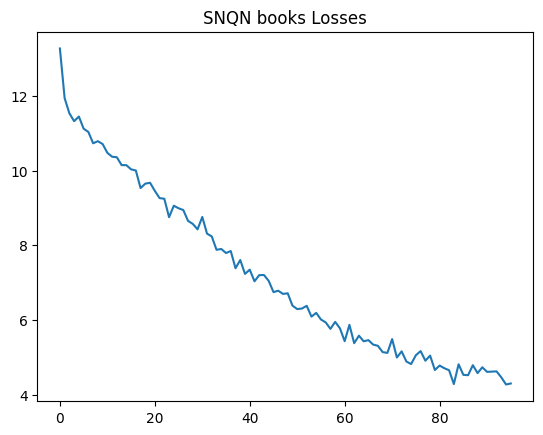

In [ ]:
arg_dict_books = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.002,
            'epoch' : 20,
            'batch_size' : 512,
            'neg' : 10,
            'discount' : 0.5
            }
results_prog = []
losses_prog = []
QN_prog, sess_prog = train(books_data_stats_prog, books_replay_buf_prog, prog_books_val_df, arg_dict=arg_dict_books, results=results_prog, losses=losses_prog, configuration='SNQN')
plt.plot(losses_prog)
plt.title('SNQN books Losses')
plt.show()


In [ ]:
_ = last_results(results_prog, print_out=True)

Rewards:
 @5 : 687.8000000000018 @10 : 870.2000000000057 @15 : 965.600000000008 @20 : 1030.6000000000097

Click HR:
 @5 : 0.012987012987012988 @10 : 0.01874262101534829 @15 : 0.021792601338055884 @20 : 0.024498229043683588

Click NDCG:
 @5 : 0.009418118079238662 @10 : 0.011270634213161306 @15 : 0.012073665419131727 @20 : 0.01271047006266816

Purchase HR:
 @5 : 0.061210719105455946 @10 : 0.07653749759012916 @15 : 0.08453826874879507 @20 : 0.08974358974358974

Purchase NDCG:
 @5 : 0.0474630016233714 @10 : 0.05243092792299922 @15 : 0.054541356758022276 @20 : 0.05576868878584621


In [ ]:
test_prog = []
test(sess_prog, QN_prog, books_data_stats_prog, prog_books_test_df, test_prog, data_dir='/content/drive/MyDrive/COURSEW/Rsrch/books_dataset')

#############################################################
total clicks: 20533, total purchase:10515
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 968.000000
clicks hr ndcg @ 5 : 0.014611, 0.010551
purchase hr and ndcg @5 : 0.086353, 0.066583
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 1141.800000
clicks hr ndcg @ 10 : 0.020163, 0.012323
purchase hr and ndcg @10 : 0.100713, 0.071241
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 1241.400000
clicks hr ndcg @ 15 : 0.023231, 0.013132
purchase hr and ndcg @15 : 0.108987, 0.073428
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 1319.200000
clicks hr ndcg @ 20 : 0.026104, 0.013807
purchase hr and ndcg @20 : 0.115264, 0.074913
#############################################################


In [ ]:
print(test_prog)

[{5: {'reward': 968.000000000004, 'click hr': 0.014610626795889543, 'click ndcg': 0.010550818892858532, 'purchase hr': 0.08635282929148835, 'purchase ndcg': 0.06658283642943855}, 10: {'reward': 1141.8000000000095, 'click hr': 0.02016266497832757, 'click ndcg': 0.012323143816619121, 'purchase hr': 0.10071326676176891, 'purchase ndcg': 0.07124057373194034}, 15: {'reward': 1241.4000000000117, 'click hr': 0.023230896605464374, 'click ndcg': 0.013132455683620542, 'purchase hr': 0.10898716119828816, 'purchase ndcg': 0.0734277293046375}, 20: {'reward': 1319.2000000000132, 'click hr': 0.026104319875322652, 'click ndcg': 0.013807217401537782, 'purchase hr': 0.11526390870185449, 'purchase ndcg': 0.07491314495544409}}]


##### Rating reward

/content/Modules/Model.py:219: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/content/Modules/SASRecModules.py:59: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None)
/content/Modules/SASRecModules.py:60: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:61: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  V = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:96: UserWarning: `tf.layers.dropout` is depre

NUM BATCHES in 1 EPOCH: 478
$$$$ STARTING EPOCH # 0 $$$$
the loss in 100th batch is: 12.558489
the loss in 200th batch is: 11.921432
the loss in 300th batch is: 11.724063
the loss in 400th batch is: 11.576715
#############################################################
total clicks: 25290, total purchase:5174
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 73.600000
clicks hr ndcg @ 5 : 0.012179, 0.008484
purchase hr and ndcg @5 : 0.002319, 0.001299
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 139.400000
clicks hr ndcg @ 10 : 0.020047, 0.011007
purchase hr and ndcg @10 : 0.007344, 0.002891
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 188.000000
clicks hr ndcg @ 15 : 0.026690, 0.012764
purchase hr and ndcg @15 : 0.010244, 0.003659
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 224.200000
clicks hr ndcg @ 20 : 0.031079, 0.013801
pu

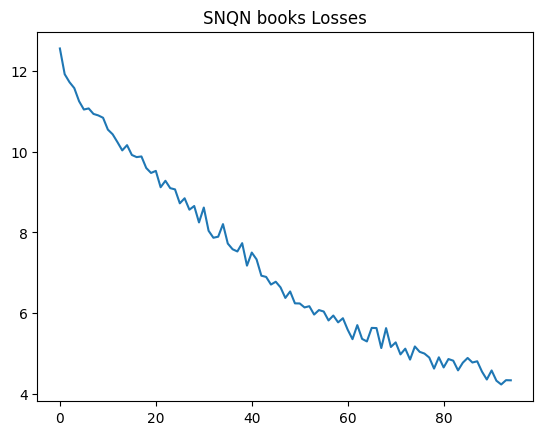

In [ ]:
results_rat = []
losses_rat = []
QN_rat, sess_rat = train(books_data_stats_rat, books_replay_buf_rat, rat_books_val_df, arg_dict=arg_dict_books, results=results_rat, losses=losses_rat, configuration='SNQN')
plt.plot(losses_rat)
plt.title('SNQN books Losses')
plt.show()


In [ ]:
_ = last_results(results_rat, print_out=True)

Rewards:
 @5 : 454.7999999999961 @10 : 539.3999999999967 @15 : 604.600000000002 @20 : 649.4000000000036

Click HR:
 @5 : 0.025662317121391855 @10 : 0.031909845788849346 @15 : 0.0368920521945433 @20 : 0.040806642941874256

Click NDCG:
 @5 : 0.018926364560011965 @10 : 0.020945785453215193 @15 : 0.022256993189213724 @20 : 0.02318225644867314

Purchase HR:
 @5 : 0.06281407035175879 @10 : 0.073057595670661 @15 : 0.08078855817549285 @20 : 0.08562040974101276

Purchase NDCG:
 @5 : 0.049387603819275386 @10 : 0.052667345988877394 @15 : 0.05472045719976476 @20 : 0.05586523473346266


In [ ]:
test_rat = []
test(sess_rat, QN_rat, books_data_stats_rat, rat_books_test_df, test_rat, data_dir='/content/drive/MyDrive/COURSEW/Rsrch/books_dataset')

#############################################################
total clicks: 25388, total purchase:4369
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 337.400000
clicks hr ndcg @ 5 : 0.021743, 0.015682
purchase hr and ndcg @5 : 0.051957, 0.039384
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 419.600000
clicks hr ndcg @ 10 : 0.028675, 0.017917
purchase hr and ndcg @10 : 0.062715, 0.042921
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 466.600000
clicks hr ndcg @ 15 : 0.032417, 0.018900
purchase hr and ndcg @15 : 0.069123, 0.044616
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 500.400000
clicks hr ndcg @ 20 : 0.035135, 0.019543
purchase hr and ndcg @20 : 0.073701, 0.045701
#############################################################


In [ ]:
print(test_rat)

[{5: {'reward': 337.3999999999971, 'click hr': 0.021742555538049473, 'click ndcg': 0.015681770481758537, 'purchase hr': 0.05195696955825132, 'purchase ndcg': 0.039384309564540566}, 10: {'reward': 419.5999999999951, 'click hr': 0.02867496455018119, 'click ndcg': 0.017917231815942642, 'purchase hr': 0.06271457999542229, 'purchase ndcg': 0.042921271080998254}, 15: {'reward': 466.5999999999941, 'click hr': 0.03241688986922956, 'click ndcg': 0.018899883531588554, 'purchase hr': 0.0691233691920348, 'purchase ndcg': 0.0446157293286467}, 20: {'reward': 500.399999999993, 'click hr': 0.03513470931148574, 'click ndcg': 0.01954252028540663, 'purchase hr': 0.07370107576104372, 'purchase ndcg': 0.0457011809148587}}]


##### Read the book by same author reward

/content/Modules/Model.py:219: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/content/Modules/SASRecModules.py:59: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None)
/content/Modules/SASRecModules.py:60: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:61: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  V = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:96: UserWarning: `tf.layers.dropout` is depre

NUM BATCHES in 1 EPOCH: 483
$$$$ STARTING EPOCH # 0 $$$$
the loss in 100th batch is: 12.264626
the loss in 200th batch is: 11.911047
the loss in 300th batch is: 11.932895
the loss in 400th batch is: 11.362698
#############################################################
total clicks: 24703, total purchase:6813
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 80.200000
clicks hr ndcg @ 5 : 0.013399, 0.009465
purchase hr and ndcg @5 : 0.002055, 0.000996
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 138.800000
clicks hr ndcg @ 10 : 0.021414, 0.011992
purchase hr and ndcg @10 : 0.004844, 0.001908
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 183.000000
clicks hr ndcg @ 15 : 0.026515, 0.013349
purchase hr and ndcg @15 : 0.007632, 0.002649
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 215.000000
clicks hr ndcg @ 20 : 0.030361, 0.014255
pu

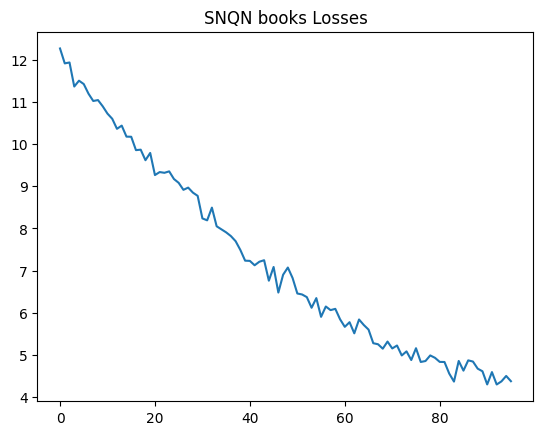

In [ ]:
results_auth = []
losses_auth = []
QN_auth, sess_auth = train(books_data_stats_auth, books_replay_buf_auth, auth_books_val_df, arg_dict=arg_dict_books, results=results_auth, losses=losses_auth, configuration='SNQN')
plt.plot(losses_auth)
plt.title('SNQN books Losses')
plt.show()


In [ ]:
_ = last_results(results_auth, print_out=True)

Rewards:
 @5 : 884.2000000000018 @10 : 1107.600000000004 @15 : 1238.0000000000066 @20 : 1314.0000000000077

Click HR:
 @5 : 0.003886167671942679 @10 : 0.006800793425899688 @15 : 0.009513014613609682 @20 : 0.011334655709832813

Click NDCG:
 @5 : 0.0024576561276873606 @10 : 0.003401541929936862 @15 : 0.004121038953627624 @20 : 0.004554033525790131

Purchase HR:
 @5 : 0.12696315866725377 @10 : 0.1576398062527521 @15 : 0.17481285777190664 @20 : 0.1846469983854396

Purchase NDCG:
 @5 : 0.09627189337670336 @10 : 0.10621151159595844 @15 : 0.11074147603285767 @20 : 0.1130538924890962


In [ ]:
test_auth = []
test(sess_auth, QN_auth, books_data_stats_auth, auth_books_test_df, test_auth, data_dir='/content/drive/MyDrive/COURSEW/Rsrch/books_dataset')

#############################################################
total clicks: 24900, total purchase:7202
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 1097.400000
clicks hr ndcg @ 5 : 0.003695, 0.002377
purchase hr and ndcg @5 : 0.149819, 0.112930
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 1308.000000
clicks hr ndcg @ 10 : 0.006225, 0.003199
purchase hr and ndcg @10 : 0.177312, 0.121877
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 1426.600000
clicks hr ndcg @ 15 : 0.008956, 0.003928
purchase hr and ndcg @15 : 0.191891, 0.125742
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 1504.400000
clicks hr ndcg @ 20 : 0.010924, 0.004390
purchase hr and ndcg @20 : 0.201333, 0.127980
#############################################################


In [ ]:
print(test_auth)

[{5: {'reward': 1097.4000000000021, 'click hr': 0.0036947791164658635, 'click ndcg': 0.002377421671245133, 'purchase hr': 0.14981949458483754, 'purchase ndcg': 0.11292956110723223}, 10: {'reward': 1308.0000000000048, 'click hr': 0.006224899598393574, 'click ndcg': 0.003198500997247627, 'purchase hr': 0.177311857817273, 'purchase ndcg': 0.1218766577748048}, 15: {'reward': 1426.6000000000074, 'click hr': 0.008955823293172691, 'click ndcg': 0.0039277324573273485, 'purchase hr': 0.1918911413496251, 'purchase ndcg': 0.1257422290681745}, 20: {'reward': 1504.4000000000096, 'click hr': 0.010923694779116465, 'click ndcg': 0.004390328749013682, 'purchase hr': 0.20133296306581505, 'purchase ndcg': 0.12798005995858283}}]


##### Read the book in the same genre reward

Instructions for updating:
non-resource variables are not supported in the long term
/content/Modules/Model.py:219: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/content/Modules/SASRecModules.py:59: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None)
/content/Modules/SASRecModules.py:60: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:61: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  V = tf.compat.v1.layers.dense(keys, num_units, activation=

NUM BATCHES in 1 EPOCH: 478
$$$$ STARTING EPOCH # 0 $$$$
the loss in 100th batch is: 13.467731
the loss in 200th batch is: 11.730984
the loss in 300th batch is: 11.527184
the loss in 400th batch is: 11.394721
#############################################################
total clicks: 18706, total purchase:13006
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 142.800000
clicks hr ndcg @ 5 : 0.011440, 0.008035
purchase hr and ndcg @5 : 0.007689, 0.005227
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 218.400000
clicks hr ndcg @ 10 : 0.018550, 0.010291
purchase hr and ndcg @10 : 0.011456, 0.006431
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 278.600000
clicks hr ndcg @ 15 : 0.026088, 0.012314
purchase hr and ndcg @15 : 0.013917, 0.007073
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 343.800000
clicks hr ndcg @ 20 : 0.030953, 0.013461


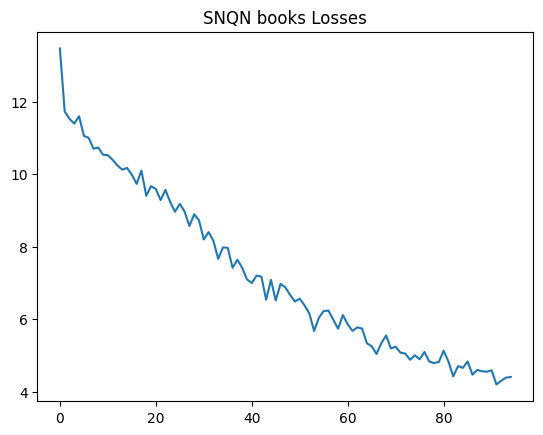

In [ ]:
results_gen = []
losses_gen = []
QN_gen, sess_gen = train(books_data_stats_gen, books_replay_buf_gen, gen_books_val_df, arg_dict=arg_dict_books, results=results_gen, losses=losses_gen, configuration='SNQN')
plt.plot(losses_gen)
plt.title('SNQN books Losses')
plt.show()


In [ ]:
_ = last_results(results_gen, print_out=True)

Rewards:
 @5 : 886.800000000001 @10 : 1124.2000000000019 @15 : 1257.6000000000026 @20 : 1363.8000000000034

Click HR:
 @5 : 0.002352186464236074 @10 : 0.0043301614455255 @15 : 0.005773548594034 @20 : 0.007163476959264407

Click NDCG:
 @5 : 0.001428977269963261 @10 : 0.002061840386717598 @15 : 0.002445560434998514 @20 : 0.0027755841705726

Purchase HR:
 @5 : 0.06750730432108258 @10 : 0.08519145009995387 @15 : 0.09503306166384745 @20 : 0.10279870828848224

Purchase NDCG:
 @5 : 0.04923186299694442 @10 : 0.05493435083742774 @15 : 0.05753253767161091 @20 : 0.05937114704346353


In [ ]:
test_gen = []
test(sess_gen, QN_gen, books_data_stats_gen, gen_books_test_df, test_gen, data_dir='/content/drive/MyDrive/COURSEW/Rsrch/books_dataset')

#############################################################
total clicks: 18787, total purchase:13029
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 1102.400000
clicks hr ndcg @ 5 : 0.003300, 0.002026
purchase hr and ndcg @5 : 0.083660, 0.062120
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 1390.200000
clicks hr ndcg @ 10 : 0.006441, 0.003019
purchase hr and ndcg @10 : 0.104843, 0.068967
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 1552.200000
clicks hr ndcg @ 15 : 0.007771, 0.003373
purchase hr and ndcg @15 : 0.116893, 0.072145
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 1679.000000
clicks hr ndcg @ 20 : 0.009581, 0.003801
purchase hr and ndcg @20 : 0.126103, 0.074315
#############################################################


In [ ]:
print(test_gen)

[{5: {'reward': 1102.4000000000015, 'click hr': 0.0033001543620588703, 'click ndcg': 0.0020256700341173693, 'purchase hr': 0.08365952874357203, 'purchase ndcg': 0.06212042235526461}, 10: {'reward': 1390.200000000004, 'click hr': 0.006440623835631021, 'click ndcg': 0.0030185505582708038, 'purchase hr': 0.10484304244377926, 'purchase ndcg': 0.06896721211887843}, 15: {'reward': 1552.2000000000048, 'click hr': 0.007771331239687018, 'click ndcg': 0.0033730623063617337, 'purchase hr': 0.11689308465730294, 'purchase ndcg': 0.07214537238075275}, 20: {'reward': 1679.000000000006, 'click hr': 0.009581093309203172, 'click ndcg': 0.0038009996842462246, 'purchase hr': 0.12610330800521913, 'purchase ndcg': 0.07431525932694656}}]


### SA2C with best reward

In [13]:
from Modules.data_processing import df_create_pop_dict


df_create_pop_dict(sh_books_auth)

10.0
13.0


Instructions for updating:
non-resource variables are not supported in the long term
/content/Modules/Model.py:219: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/content/Modules/SASRecModules.py:59: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None)
/content/Modules/SASRecModules.py:60: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:61: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  V = tf.compat.v1.layers.dense(keys, num_units, activation=

NUM BATCHES in 1 EPOCH: 484
$$$$ STARTING EPOCH # 0 $$$$
the loss in 100th batch is: 12.761301
the loss in 200th batch is: 11.649755
the loss in 300th batch is: 11.501947
the loss in 400th batch is: 11.320302
#############################################################
total clicks: 25025, total purchase:7318
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 195.000000
clicks hr ndcg @ 5 : 0.012707, 0.009451
purchase hr and ndcg @5 : 0.004919, 0.002620
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 307.500000
clicks hr ndcg @ 10 : 0.019940, 0.011765
purchase hr and ndcg @10 : 0.007926, 0.003588
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 403.500000
clicks hr ndcg @ 15 : 0.026494, 0.013495
purchase hr and ndcg @15 : 0.009839, 0.004096
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 481.000000
clicks hr ndcg @ 20 : 0.030769, 0.014502
p

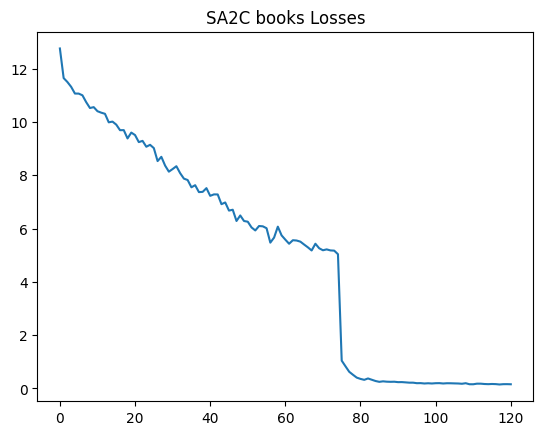

In [14]:
arg_dict_books_sa2c = {'r_click' : 0.5,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.0025,
            'lr2' : 0.0005,
            'epoch' : 25,
            'batch_size' : 512,
            'neg' : 10,
            'discount' : 0.5,
            'smooth' : 0.0,
            'clip' : 0.0
            }
results_sa2c = []
losses_sa2c = []
SA2C_books, sess_sa2c_books = train(books_data_stats_auth, books_replay_buf_auth, auth_books_val_df, arg_dict=arg_dict_books_sa2c, results=results_sa2c, losses=losses_sa2c, sa2c_switch_step=7500, configuration='SA2C', data_dir='.')
plt.plot(losses_sa2c)
plt.title('SA2C books Losses')
plt.show()




In [15]:
_ = last_results(results_sa2c, print_out=True)

Rewards:
 @5 : 636.0 @10 : 843.5 @15 : 1000.0 @20 : 1105.0

Click HR:
 @5 : 0.0055144855144855145 @10 : 0.008351648351648353 @15 : 0.010869130869130869 @20 : 0.012147852147852148

Click NDCG:
 @5 : 0.004072705280640982 @10 : 0.0049836067665395304 @15 : 0.005646230274916432 @20 : 0.005947624985955831

Purchase HR:
 @5 : 0.07748018584312653 @10 : 0.10098387537578574 @15 : 0.11806504509428806 @20 : 0.13022683793386172

Purchase NDCG:
 @5 : 0.05820204965043839 @10 : 0.06582940795523783 @15 : 0.07034578959770572 @20 : 0.07321543142609384


In [17]:
test_auth_sa2c = []
test(sess_sa2c_books, SA2C_books, books_data_stats_auth, auth_books_test_df, test_auth_sa2c, r_click=0.5, data_dir='.')

#############################################################
total clicks: 24553, total purchase:6996
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 616.500000
clicks hr ndcg @ 5 : 0.004032, 0.002791
purchase hr and ndcg @5 : 0.081046, 0.062123
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 804.000000
clicks hr ndcg @ 10 : 0.006679, 0.003645
purchase hr and ndcg @10 : 0.103202, 0.069261
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 949.000000
clicks hr ndcg @ 15 : 0.008879, 0.004220
purchase hr and ndcg @15 : 0.120069, 0.073749
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 1048.000000
clicks hr ndcg @ 20 : 0.010019, 0.004490
purchase hr and ndcg @20 : 0.132218, 0.076621
off-line corrected evaluation (click_ng,purchase_ng) @10: 0.000101, 0.022707
#############################################################


In [18]:
df_create_pop_dict(sh_books_prog)

3.0
7.0
9.0
10.0
12.0


/content/Modules/Model.py:219: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/content/Modules/SASRecModules.py:59: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None)
/content/Modules/SASRecModules.py:60: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:61: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  V = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:96: UserWarning: `tf.layers.dropout` is depre

NUM BATCHES in 1 EPOCH: 477
$$$$ STARTING EPOCH # 0 $$$$
the loss in 100th batch is: 13.156544
the loss in 200th batch is: 11.710374
the loss in 300th batch is: 11.365252
the loss in 400th batch is: 11.283792
#############################################################
total clicks: 21770, total purchase:9485
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 194.500000
clicks hr ndcg @ 5 : 0.013551, 0.009233
purchase hr and ndcg @5 : 0.004955, 0.002704
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 324.500000
clicks hr ndcg @ 10 : 0.020717, 0.011483
purchase hr and ndcg @10 : 0.010438, 0.004483
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 392.500000
clicks hr ndcg @ 15 : 0.025402, 0.012734
purchase hr and ndcg @15 : 0.012230, 0.004960
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 478.000000
clicks hr ndcg @ 20 : 0.028939, 0.013568
p

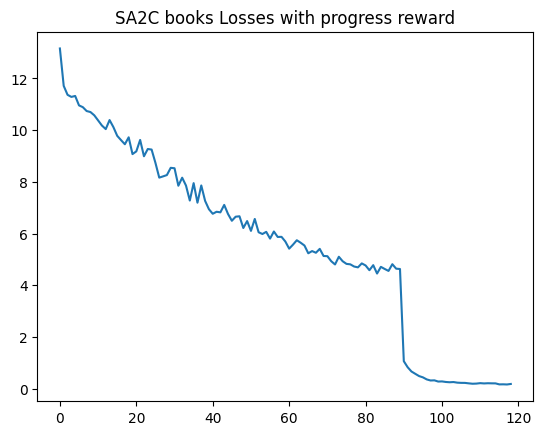

In [19]:
results_sa2c_prog = []
losses_sa2c_prog = []
SA2C_books_prog, sess_sa2c_books_prog = train(books_data_stats_prog, books_replay_buf_prog, prog_books_val_df, arg_dict=arg_dict_books_sa2c, results=results_sa2c_prog, losses=losses_sa2c_prog, sa2c_switch_step=9000, configuration='SA2C', data_dir='.')
plt.plot(losses_sa2c_prog)
plt.title('SA2C books Losses with progress reward')
plt.show()

In [20]:
_ = last_results(results_sa2c_prog, print_out=True)

Rewards:
 @5 : 474.0 @10 : 682.0 @15 : 819.0 @20 : 918.0

Click HR:
 @5 : 0.013137344970142397 @10 : 0.020854386770785483 @15 : 0.026182820395039046 @20 : 0.029857602204869087

Click NDCG:
 @5 : 0.008714303914388535 @10 : 0.011171110292672131 @15 : 0.012568582936170476 @20 : 0.01343764440613181

Purchase HR:
 @5 : 0.03489720611491829 @10 : 0.04797047970479705 @15 : 0.05629942013705851 @20 : 0.0625197680548234

Purchase NDCG:
 @5 : 0.023671821460448987 @10 : 0.027864749835354426 @15 : 0.03006306756922388 @20 : 0.03152464619543636


In [21]:
test_prog_sa2c = []
test(sess_sa2c_books_prog, SA2C_books_prog, books_data_stats_prog, prog_books_test_df, test_prog_sa2c, r_click=0.5, data_dir='.')

#############################################################
total clicks: 20353, total purchase:10031
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 503.000000
clicks hr ndcg @ 5 : 0.013561, 0.008983
purchase hr and ndcg @5 : 0.036387, 0.024118
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 727.500000
clicks hr ndcg @ 10 : 0.020783, 0.011282
purchase hr and ndcg @10 : 0.051441, 0.028946
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 880.000000
clicks hr ndcg @ 15 : 0.025353, 0.012491
purchase hr and ndcg @15 : 0.062008, 0.031743
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 995.500000
clicks hr ndcg @ 20 : 0.030118, 0.013612
purchase hr and ndcg @20 : 0.068687, 0.033316
off-line corrected evaluation (click_ng,purchase_ng) @10: 0.000831, 0.006200
#############################################################
